# Plot area at worldmap 
Used files for `MOD03.A2003195.1620.061.2017193153042.hdf`

In [1]:
import os
import gc
import glob
import netCDF4
import numpy as np
import pandas as pd
#from pyhdf.SD import SD, SDE

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import cartopy as cart
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
from collections import defaultdict

In [2]:
import sys
import gc
from pathlib  import Path
from pyhdf.SD import SD, SDC
from PIL import Image
from mpl_toolkits.basemap import Basemap
from pylab import *

In [3]:
homedir=str(Path.home())
clouds_dir="/modis-climate/apps/lib4modis"
sys.path.insert(1,os.path.join(sys.path[0],homedir+clouds_dir))
from loader import read_hdf, proc_sds

## Import MOD02/MOD03 data

In [4]:
#hdf_mod03_datadir="/home/tkurihana/scratch-midway2/data/MOD03/MOD03/2003/015"
hdf_mod03_datadir="/home/tkurihana/scratch-midway2/data/MOD03/MOD03/2003/195"

In [5]:
def proc_coord(sds_array):
            """ sds_array = hdf_m03.select("Longitude")
            """
            array = sds_array.get()
            array = array.astype(np.float32)
            nan_idx = np.where( array == sds_array.attributes()['_FillValue'])
            if len(nan_idx) > 0:
              array[nan_idx] = np.nan
            return array

In [6]:
mod03_hdf = glob.glob(os.path.join(hdf_mod03_datadir, "MOD03.A2003195.1620.061.2017193153042.hdf"))[0]

In [7]:
hdf_m03 = SD(mod03_hdf, SDC.READ)
lats = proc_coord(hdf_m03.select("Latitude") )
lons = proc_coord(hdf_m03.select("Longitude") )

In [8]:
swath = np.load("TrueColor-MOD021KM.A2003195.1620.061.2017194170710.png.npy")

## Thinning data

In [9]:
lon_centers = []
lat_centers = []
ps=4
xs = np.arange(0,swath.shape[0],ps)
ys = np.arange(0,swath.shape[1],ps)
sdata=[]
#tswath = np.zeros((len(xs),len(ys)) )
for idx, x in enumerate(xs):
    for idy, y in enumerate(ys):
        lon_centers.append(lons[int(x),int(y)])
        lat_centers.append(lats[int(x),int(y)])
        sdata.append(swath[int(x),int(y),0])

## Visualize regions in worldmap

colorbar

In [10]:
# https://stackoverflow.com/questions/64633018/removing-white-or-light-colors-from-matplotlib-color-palette
min_val, max_val = 0.3,1
n = 10
orig_cmap = plt.cm.ocean
colors = orig_cmap(np.linspace(min_val, max_val, n))
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

visualize

In [11]:
fmetaname= "MOD021KM.A2003195.1620"

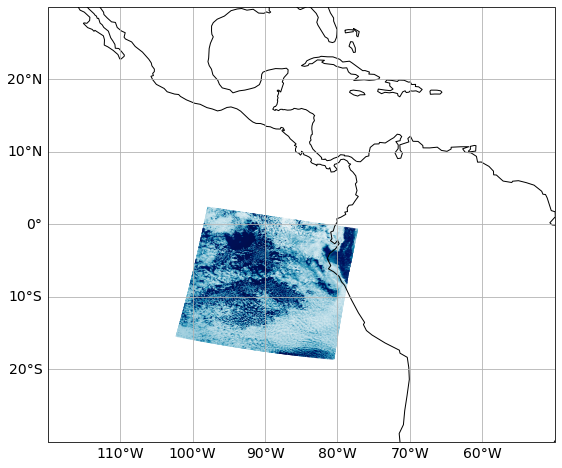

In [18]:
#figsize=(10,10)
figsize=(10,8)
matplotlib.rcParams.update({'font.size':14} )
fig = plt.figure(figsize=figsize)
lc = ccrs.PlateCarree(central_longitude=0)
#ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=180.0))
ax = fig.add_subplot(1,1,1, projection=lc)
#ax.set_extent((-125,-35,35,-40), crs=lc) # (lon.min, lon.max, lat.min, lat.max)
#ax.set_extent((-120,-60,30,-30), crs=lc) # (lon.min, lon.max, lat.min, lat.max)
ax.set_extent((-120,-50,30,-30), crs=lc) # (lon.min, lon.max, lat.min, lat.max)

# land and ocean
ax.coastlines()
ax.add_feature(cart.feature.LAND, color='white',zorder=-100, 
               edgecolor='k',alpha=0.5)
#ax.set_global()
# visualize
sc = ax.scatter(lon_centers, lat_centers, c=sdata,
                cmap=mycmap,rasterized=True,
                transform=lc,s=0.1)

# labels
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# show             
#plt.show()
os.makedirs("./figs", exist_ok=True)
pdf = PdfPages(os.path.join("./figs", f'geoframe_{fmetaname}2.pdf'))
plt.savefig(pdf, format='pdf', bbox_inches = 'tight')
plt.show()
pdf.close()
pdf = None